In [1]:
import tensorflow as tf
from tensorflow_probability import distributions as tfd
import tensorflow_probability as tfp
import tensorflow.keras.backend as K
import math as m
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def generate_data(N=100, alpha=0, z_prior_type='uniform', sigma_z_prior=1, r_bias=0, sigma_reward=0.1, sigma_bias=0):
  gamma = np.array([tf.cos(tf.cast(alpha,tf.float32)), tf.sin(tf.cast(alpha,tf.float32))])

  if z_prior_type == 'normal':
      z_prior = tfd.MultivariateNormalDiag(loc=[0,0], scale_diag=[sigma_z_prior,sigma_z_prior]);
  elif z_prior_type == 'uniform':
      z_prior = tfd.Uniform([0,0],[sigma_z_prior,sigma_z_prior])

  z = np.array(z_prior.sample(N))

  r_noise = tfd.Normal(0, sigma_reward).sample(N)
  r_mean = tf.reduce_sum(tf.multiply(gamma,z),1) + r_bias
  r = r_mean + r_noise
  
  return {'z':z,'r':r}

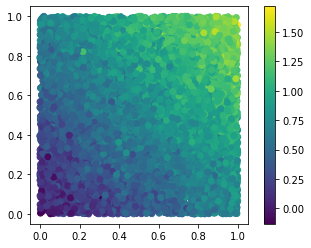

In [3]:
data = generate_data(10000,alpha=np.pi/4)
plt.scatter(*data['z'].T,c=data['r'])
plt.gca().set_aspect('equal')
plt.colorbar();